# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pylab as plt
from collections import defaultdict
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis (EDA)

### Load Dataset

In [2]:
# Load the dataset from the JSON file into a Pandas DataFrame
df = pd.read_json('task_1_train_data.json')

### Initial Data Overview

Upon inspecting the first few rows of our dataset using the `head()` method, we observe the following structure:

- **Columns**: The dataset consists of several key columns such as `browser`, `os`, `locale`, `user_id`, `location`, `sites`, `time`, and `date`.

This structure gives us an overview of the categorical and numerical types of data available in our dataset, which will help in guiding our further analysis. For instance:
- **Categorical Data**: `browser`, `os`, `locale`, and `location` are categorical and may require encoding for numerical analysis.
- **Numerical Data**: Analysis on `sites` could be expanded by extracting features such as total browsing time or average visit length.
- **Temporal Data**: `time` and `date` suggest opportunities for temporal analysis, like activity patterns over time.

In [3]:
# Display the first five rows of the DataFrame
df.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


### Dataset Information and Type Overview

The `info()` method provides a concise summary of our DataFrame, detailing the number of entries, the non-null count, and the data type of each column:

- **Entries**: The DataFrame consists of 40,000 entries.
- **Columns**: There are eight columns in total.
- **Data Types**:
  - `object`: Most columns are of object type, including `browser`, `os`, `locale`, `location`, `sites`, and `time`. These may contain strings or lists and may require preprocessing such as encoding or extraction of features.
  - `int64`: The `user_id` column, which provides a numeric identifier for each user.
  - `datetime64[ns]`: The `date` column, which holds the dates of the browsing sessions in a datetime format conducive to time series analysis.
- **Non-Null Counts**: All columns are fully populated with non-null values, eliminating the immediate need for handling missing data.

This detailed type overview helps in identifying the preprocessing steps needed, such as:
- Converting categorical data (`browser`, `os`, `locale`, `location`) into a format suitable for machine learning models.
- Extracting numeric or time-based features from the `sites`, `date` and `time` columns.

In [4]:
# Displaying detailed information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   40000 non-null  object        
 1   os        40000 non-null  object        
 2   locale    40000 non-null  object        
 3   user_id   40000 non-null  int64         
 4   location  40000 non-null  object        
 5   sites     40000 non-null  object        
 6   time      40000 non-null  object        
 7   date      40000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.4+ MB


### Statistical Summary of Numerical and DateTime Data

We use the `describe()` method to obtain a statistical summary for the numerical and datetime columns in our dataset. This summary provides insights into the distribution and central tendencies of these features:

- **`user_id`**:
  - **Count**: The `user_id` column has 40,000 non-null entries, consistent with the total number of entries in the dataset.
  - **Mean**: The average user ID is approximately 99.5, which suggests that user IDs are evenly distributed.
  - **Min/Max**: User IDs range from 0 to 199, indicating 200 unique users.

- **`date`**:
  - **Count**: All 40,000 entries include a date, showing full coverage across the data.
  - **Min/Max Dates**: The dates range from January 14, 2016, to September 28, 2017, indicating data collection over approximately 20 months.
  - **Quartiles**: The quartile values indicate that the data collection is evenly spread out over the period, with no gaps or clustering evident at specific times.

In [5]:
# Displaying statistical summaries for numerical and datetime columns
df.describe()

,user_id,date
count,40000.000000,40000
mean,99.500000,2016-11-09 05:19:04.079999744
min,0.000000,2016-01-14 00:00:00
25%,49.750000,2016-06-12 00:00:00
50%,99.500000,2016-11-09 00:00:00
75%,149.250000,2017-04-09 00:00:00
max,199.000000,2017-09-28 00:00:00
std,57.735027,NaN


### Visualizing Categorical Distributions

To better understand the distribution of categorical data within our dataset, we visualize several key features: `browser`, `os`, `locale`, and `location`. These plots will help us identify any imbalances or patterns that could influence model performance or data preprocessing steps.

- **Browser Distribution**: The first subplot shows the frequency of each browser type used by the users.
- **Operating System Distribution**: The second subplot displays the diversity of operating systems.
- **Locale Distribution**: The third plot explores the locales, providing insights into the geographic or language preferences that may affect the data.
- **Location Distribution**: Finally, the fourth subplot illustrates where users are geographically located.

**We can notice uneven distribution in the data, which could bias the model.**

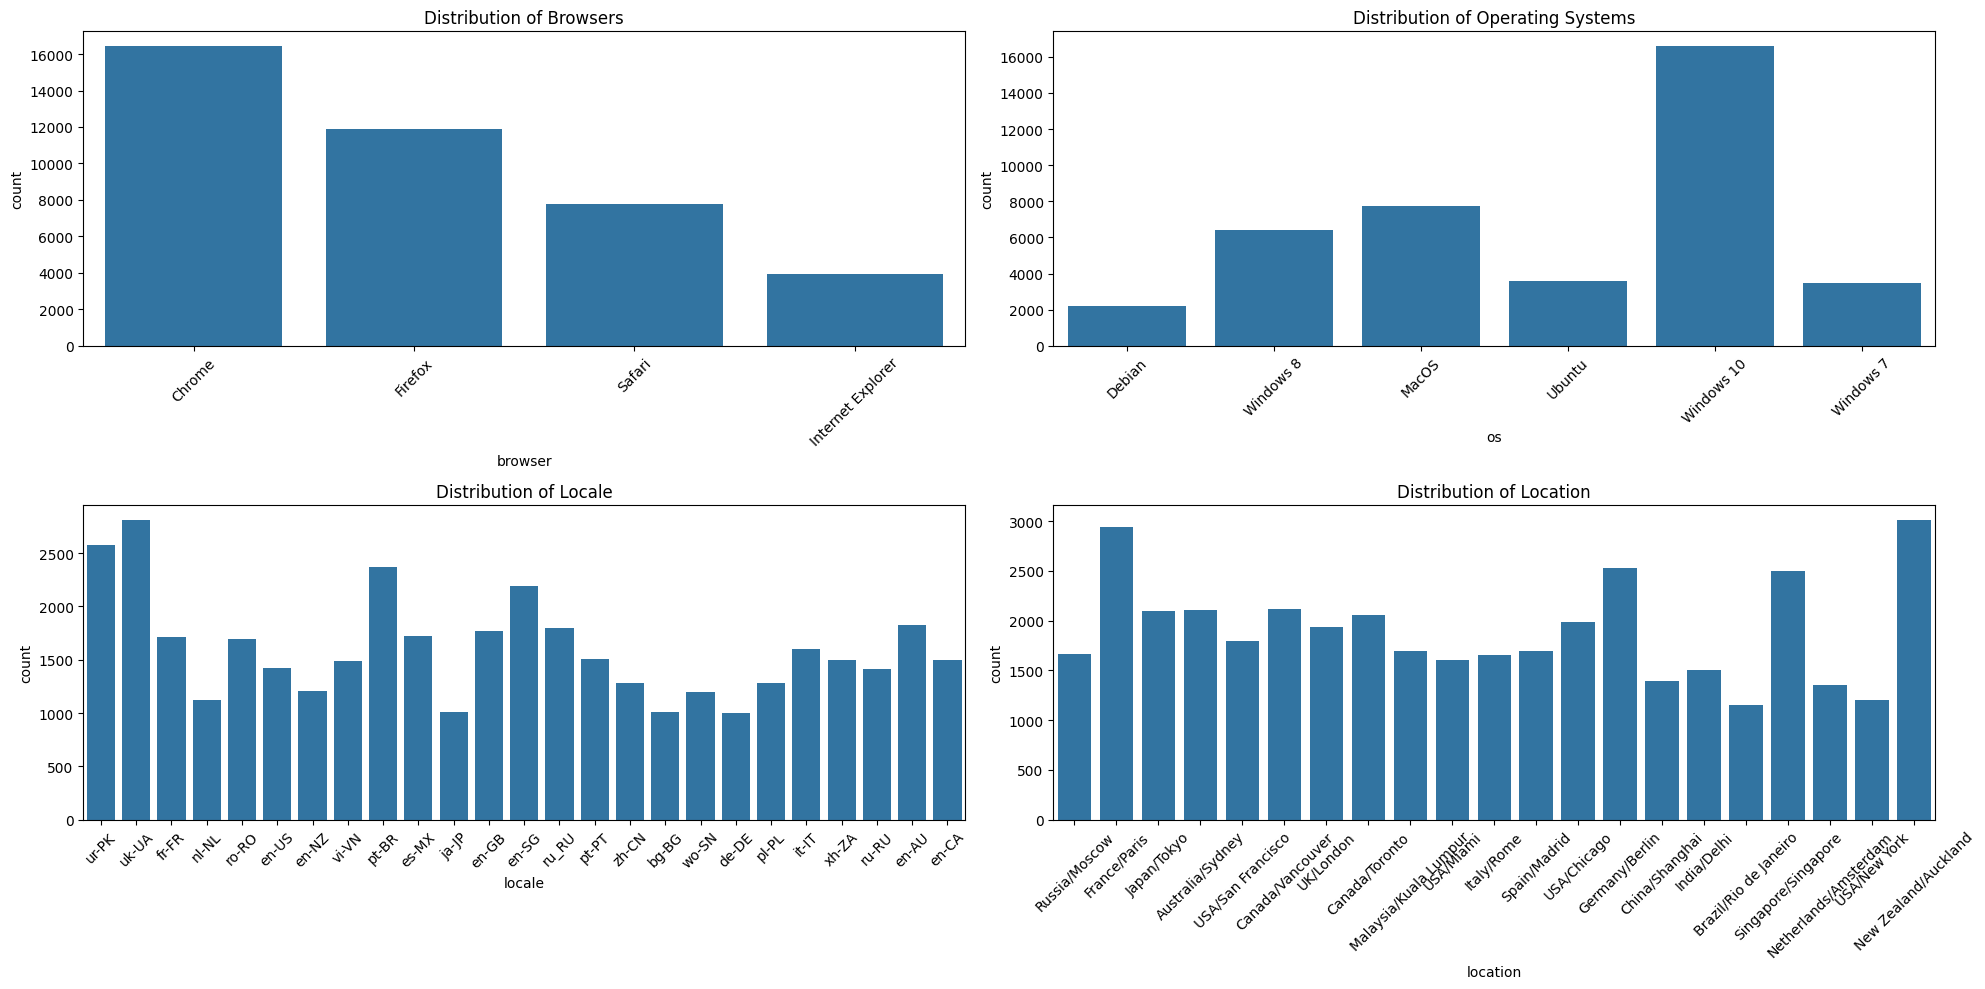

In [6]:
# Set up the figure with specified size
plt.figure(figsize=(20, 10))

# Plot the distribution of 'browser'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='browser')
plt.title('Distribution of Browsers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot the distribution of 'os'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='os')
plt.title('Distribution of Operating Systems')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot the distribution of 'locale'
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='locale')
plt.title('Distribution of Locale')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot the distribution of 'location'
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='location')
plt.title('Distribution of Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust the layout to prevent overlap and ensure clarity
plt.tight_layout()
# Display all plots
plt.show()

### Relationship Between Browser and Operating System

This plot presents a cross-tabulation of browsers against operating systems, giving us a more nuanced view of the users' preferences and behaviors:

- **Interaction of Features**: By plotting browsers on the x-axis and differentiating operating systems with hues, we can observe which combinations are most and least common.
- **Insights**: The bar heights show the count of users per browser, split into colored segments that represent the different operating systems. This helps us to see, for example, if certain browsers are more likely to be used with specific operating systems.

In our graph we notice such example when it comes to `Safari` which is only used on `MacOS`.

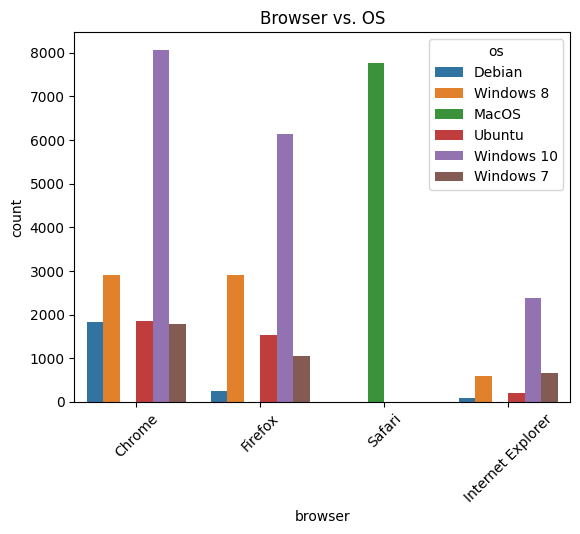

In [7]:
# Create a count plot to explore the relationship between browser and operating system
sns.countplot(x='browser', hue='os', data=df)
plt.title('Browser vs. OS')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()  # Display the plot

### Heatmap of Locale vs. Location

To further understand the geographic distribution of users, we create a pivot table that aggregates the count of locations for each locale. This pivot table serves as the data foundation for a heatmap, which visualizes the density of user locations across different locales:

- **Pivot Table**: By grouping the data by `locale` and `location`, and using the size function, we can count the occurrences of each combination. The `unstack` method is then applied to reshape the data into a matrix format suitable for a heatmap.
- **Heatmap Visualization**: The heatmap uses color intensity to represent the counts, making it easier to spot regions with higher or lower densities of users. Annotations on the heatmap provide the exact count of users for each `locale`-`location` pairing, adding a quantitative aspect to the visual representation.
- **Insights**: This visualization can reveal if certain locales are concentrated in specific locations or if there's a widespread distribution, which could have implications for user behavior analysis and regional marketing strategies.

There are many zeros in the heatmap, indicating that certain locale-location combinations are very rare or don't exist in your dataset. There are also significant counts in cells where the locale does not match the location, such as `ru_RU` locale being used in `France/Paris`


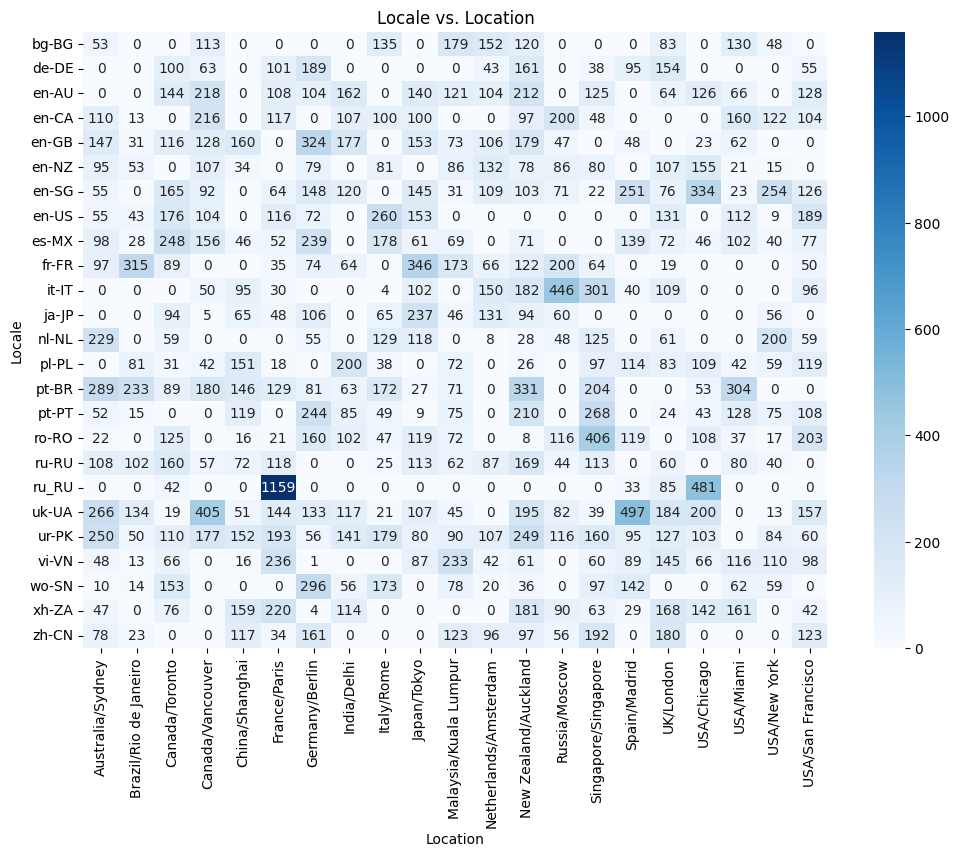

In [8]:
# Creating a pivot table to count locations for each locale
pivot_table = df.groupby(['locale', 'location']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Locale vs. Location')
plt.xlabel('Location')
plt.ylabel('Locale')
plt.show()

### Analysis of Browsing Session Characteristics

To delve deeper into the browsing behavior of users, we analyze two key aspects of the sessions: the number of sites visited and the length of visits to each site.

- **Number of Sites Visited**:
  - We first look at the distribution of the number of sites visited in a single session.
  - A histogram with a Kernel Density Estimate (KDE) provides a visual representation of this distribution, highlighting common session lengths and identifying any outliers.
  - The X-axis represents the number of sites visited, while the Y-axis represents the count of sessions with that number of site visits.

- **Site Visit Lengths**:
  - The second histogram focuses on the length of visits to individual sites.
  - By flattening the list of site lengths from each user session, we plot the distribution to understand how long users typically spend on a site.
  - The X-axis represents the duration of visits to sites, and the Y-axis represents the frequency of these durations across all sessions.

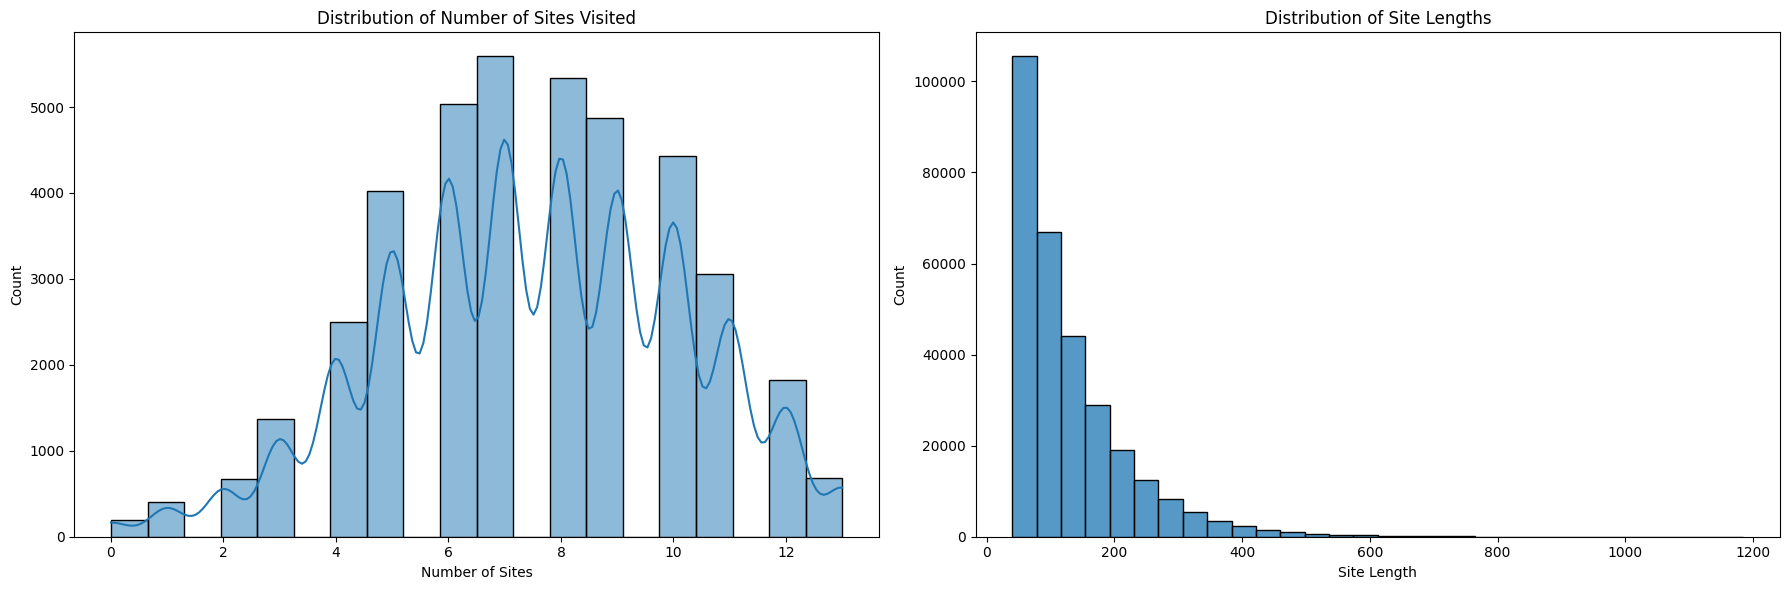

In [9]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot the distribution of number of sites visited
sns.histplot(df['sites'].apply(len), bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Number of Sites Visited')
axes[0].set_xlabel('Number of Sites')
axes[0].set_ylabel('Count')

# Plot the distribution of site lengths
site_lengths = [site['length'] for row in df['sites'] for site in row]
sns.histplot(data=site_lengths, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Site Lengths')
axes[1].set_xlabel('Site Length')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Top-Level Domain Analysis

We perform an analysis on the frequency of visits to different top-level domains (TLDs) to understand the domain categories that users are interested in:

- **Extraction and Counting**:
  - We iterate over the `sites` list in our dataset to extract the domain from each site's URL.
  - We then use a `defaultdict` to count the number of times each TLD appears in the dataset.
  
- **Sorting and Thresholding**:
  - After counting, we sort the domains based on their frequency in descending order.
  - We identify how many unique TLDs are visited more than 100 times, setting a threshold that might indicate a high-interest domain category.

- **Insights**:
  - The number of domains with more than 100 visits are 33.

  (reference): https://docs.python.org/3/library/collections.html#collections.defaultdict

In [10]:
# Initialize a default dictionary to count occurrences of top-level domains
domain_categories = defaultdict(int)

# Extract the top-level domain from each site and increment its count
for site_list in df['sites']:
    for site_data in site_list:
        site_url = site_data['site']
        domain = site_url.split('.')[-1]  # Extract the TLD
        domain_categories[domain] += 1  # Increment the count for this TLD

# Prepare lists of domains and their counts
domains = list(domain_categories.keys())
counts = list(domain_categories.values())

# Sort the indices based on counts in descending order and rearrange domains and counts
sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
sorted_domains = [domains[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

# Count how many domains were visited more than 100 times
domain_count = sum(1 for i in sorted_counts if i > 100)

# Print the result
print(f'Number of domain visited more than 100 times: {domain_count}')
print(f'Top 10 domains visited: {sorted_domains[:10]}')

Number of domain visited more than 100 times: 33
Top 10 domains visited: ['com', 'fr', 'org', 'net', 'ru', 'me', 'cn', 'edu', 'info', 'de']


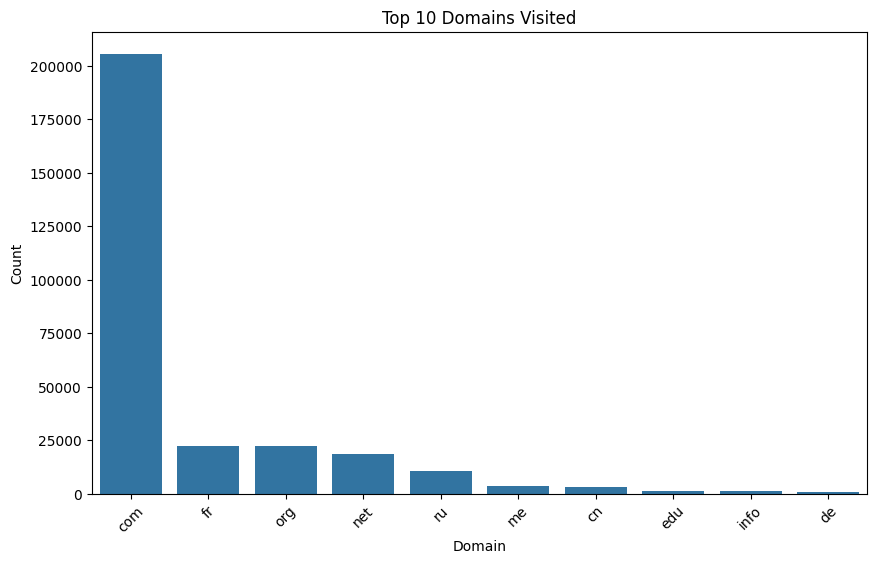

In [11]:
# Plot the top 10 domains using a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
# Create a bar plot with the sorted top 10 domains on the x-axis and their corresponding counts on the y-axis
sns.barplot(x=sorted_domains[:10], y=sorted_counts[:10])
plt.title('Top 10 Domains Visited')  # Set the title of the plot
plt.xlabel('Domain')  # Label the x-axis as "Domain"
plt.ylabel('Count')  # Label the y-axis as "Count"
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees for better readability
plt.show()  # Display the plot


# Data Preprocessing and Feature Engineering

### Creating Features for Top Domains

In this step, we focus on engineering features that capture the presence of the top domains in user sessions:

- **Top Domains**:
  - We select the top 5 domains as they are likely to have a significant presence and may offer valuable predictive power.

- **Dummy Variables**:
  - For each of the top 5 domains, we add a new dummy variable to our DataFrame. These dummy variables will have a value of 1 if the domain is visited during a session, and 0 otherwise.

- **Updating DataFrame**:
  - We iterate through each session and update the dummy variables to reflect whether any of the top 5 domains were visited in that session.

In [12]:
# Select the top 5 domains
top_domains = sorted_domains[:5]

# Add dummy variables for the top 5 domains to the DataFrame
for domain in top_domains:
    df[domain] = 0

# Update the dummy variables based on sessions in the DataFrame
for i, session in enumerate(df['sites']):
    for site_data in session:
        site_url = site_data['site']
        # Extract the domain from the site URL
        domain = site_url.split('.')[-1]
        # Check if the domain is one of the top 5 domains
        if domain in top_domains:
            # Update the corresponding dummy variable to 1 if the domain is present in the session
            df.at[i, domain] = 1

# Display the updated DataFrame with dummy variables for the top 5 domains
df.head()

,browser,os,locale,user_id,location,sites,time,date,com,fr,org,net,ru
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29,1,1,0,1,0
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23,1,0,1,0,0
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17,1,0,0,0,0
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23,1,0,0,0,0
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23,1,0,0,0,0


### Session Time and Site Count

To enrich our dataset with more information about user behavior, we add two new features:

- **Average Session Time**: This feature represents the average amount of time spent across all sites visited in a session. It's calculated by summing the lengths of all site visits within a session and dividing by the number of sites visited.

- **Number of Sites in Session**: This feature indicates the total number of sites a user visited in one session, giving a sense of user engagement and browsing activity.

These new features are added to the DataFrame as `session_num_sites` and `avg_session_time`, respectively, after which the original `sites` column is dropped to streamline the dataset.

In [13]:
# Initialize lists to store the new feature values
avg_time_column = []
num_sites_column = []

# Loop over each row's 'sites' data to calculate the new features
for sites in df['sites']:
    time = 0
    lengths = []
    # Ensure there are sites in the session to avoid division by zero
    if len(sites) != 0:
        for site in sites:
            time += site['length']  # Sum the length of each site visit
            lengths.append(site['length'])

        avg_time_column.append(int(time / len(sites)))  # Calculate average time
        num_sites_column.append(len(sites))  # Count the number of sites
    else:
        avg_time_column.append(0)  # Default to 0 if no sites were visited
        num_sites_column.append(0)

# Drop the original 'sites' column as it's no longer needed
df.drop(columns=['sites'], inplace=True)

# Add the new features to the DataFrame
df['session_num_sites'] = num_sites_column
df['avg_session_time'] = avg_time_column

# Display the updated DataFrame with the new features
df.head()


,browser,os,locale,user_id,location,time,date,com,fr,org,net,ru,session_num_sites,avg_session_time
0,Chrome,Debian,ur-PK,116,Russia/Moscow,04:12:00,2017-06-29,1,1,0,1,0,10,84
1,Firefox,Windows 8,uk-UA,155,France/Paris,03:57:00,2016-03-23,1,0,1,0,0,8,150
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,05:26:00,2016-11-17,1,0,0,0,0,1,335
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,00:05:00,2016-08-23,1,0,0,0,0,3,168
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,22:55:00,2016-07-23,1,0,0,0,0,8,150


### Converting Time Column to Datetime Format

We convert the `time` column from a string format to a `datetime` object:

- We utilize Pandas' `to_datetime` function to transform the `time` strings into datetime objects, specifying the format to match the time representation (`%H:%M:%S`).

(reference): https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [14]:
# Convert the 'time' column from a string format to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Check the new data types of the DataFrame to confirm the successful conversion
df.dtypes

browser                      object
os                           object
locale                       object
user_id                       int64
location                     object
time                 datetime64[ns]
date                 datetime64[ns]
com                           int64
fr                            int64
org                           int64
net                           int64
ru                            int64
session_num_sites             int64
avg_session_time              int64
dtype: object

### Extracting Date and Time Components

To capitalize on the potential predictive power of temporal data, we extract granular time-based features from the `date` and `time` columns:

- **Date Features**:
  - We extract the `year`, `month`, and `day` from the `date` column.

- **Time Features**:
  - From the `time` column, we extract `hour` and `minute`.

After extracting these features, we remove the original `date` and `time` columns to avoid redundancy and to streamline the dataset for modeling.

(reference): https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties

In [15]:
# Extract year, month, and day from 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Extract hour and minute from 'time' column
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

# Drop the original 'date' and 'time' columns as they are now redundant
df.drop(columns=['date', 'time'], inplace=True)

# Display the first few rows of the DataFrame to verify the new columns
df.head()

,browser,os,locale,user_id,location,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,day,hour,minute
0,Chrome,Debian,ur-PK,116,Russia/Moscow,1,1,0,1,0,10,84,2017,6,29,4,12
1,Firefox,Windows 8,uk-UA,155,France/Paris,1,0,1,0,0,8,150,2016,3,23,3,57
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,1,0,0,0,0,1,335,2016,11,17,5,26
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,1,0,0,0,0,3,168,2016,8,23,0,5
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,1,0,0,0,0,8,150,2016,7,23,22,55


### One-Hot Encoding of Categorical Features

We convert categorical variables into a machine-readable format:

- **Dummy Variables**:
  - For the `browser`, `os`, `locale`, and `location` columns, we create dummy variables using one-hot encoding.
  - By creating a separate binary (0 or 1) column for each category, we enable the ANN model to incorporate these categorical features effectively.

- **Concatenation**:
  - We concatenate these new dummy variable DataFrames to the original DataFrame.

- **Cleanup**:
  - After concatenation, we remove the original categorical columns from the DataFrame, as they are now represented by the dummy variables.


(reference): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [16]:
# Generate dummy variables for categorical columns
browser_dummies = pd.get_dummies(df['browser'], prefix='browser').astype('int')
os_dummies = pd.get_dummies(df['os'], prefix='os').astype('int')
locale_dummies = pd.get_dummies(df['locale'], prefix='locale').astype('int')
location_dummies = pd.get_dummies(df['location'], prefix='location').astype('int')

# Concatenate the dummy variable DataFrames to the original DataFrame
df = pd.concat([df, browser_dummies, os_dummies, locale_dummies, location_dummies], axis=1)

# Drop the original columns as they have been replaced by the dummy variables
df.drop(columns=['browser', 'os', 'locale', 'location'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
df.head()

,user_id,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,116,1,1,0,1,0,10,84,2017,6,...,0,0,1,0,0,0,0,0,0,0
1,155,1,0,1,0,0,8,150,2016,3,...,0,0,0,0,0,0,0,0,0,0
2,39,1,0,0,0,0,1,335,2016,11,...,0,0,0,0,0,0,0,0,0,0
3,175,1,0,0,0,0,3,168,2016,8,...,0,0,0,0,0,0,0,0,0,0
4,50,1,0,0,0,0,8,150,2016,7,...,0,0,0,0,0,0,0,0,0,1


### Removing Redundant Feature: `Safari Browser`

- **Rationale for Removal**:
  - The `browser_Safari` column is dropped from the DataFrame because its presence is strongly associated with the `MacOS` operating system. Including both features (`browser_Safari` and macOS-related dummy variables) could lead to multicollinearity, where independent variables are highly correlated. This can distort the model's performance and interpretability.

In [17]:
# Remove the column 'browser_Safari' from the DataFrame
df = df.drop('browser_Safari', axis=1)

# Display the first few rows of the modified DataFrame
df.head()

,user_id,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,116,1,1,0,1,0,10,84,2017,6,...,0,0,1,0,0,0,0,0,0,0
1,155,1,0,1,0,0,8,150,2016,3,...,0,0,0,0,0,0,0,0,0,0
2,39,1,0,0,0,0,1,335,2016,11,...,0,0,0,0,0,0,0,0,0,0
3,175,1,0,0,0,0,3,168,2016,8,...,0,0,0,0,0,0,0,0,0,0
4,50,1,0,0,0,0,8,150,2016,7,...,0,0,0,0,0,0,0,0,0,1


In [18]:
print(f"Number of users that has the id '0': {len(df.query('user_id == 0'))}")

Number of users that has the id '0': 200


### Creating the Target Variable: `is_waldo`

- **Objective**:
  - We introduce a target variable `is_waldo` to the DataFrame, which identifies whether a session belongs to a specific user of interest, termed "Waldo" in this context. This binary variable is set to `1` if the `user_id` is 0 (Waldo's ID), and `0` otherwise.

- **Reason for Removal of `user_id`**:
  - The `user_id` column is removed post-creation of the target variable to ensure that the model does not simply learn to recognize Waldo based on the ID.
  Instead, it should learn from other behavioral and session-based features to predict whether a session is Waldo's.

In [19]:
# Create the target variable 'is_waldo' based on the user ID
is_waldo = []
for usr in df['user_id']:
    if usr == 0:
        is_waldo.append(1)
    else:
        is_waldo.append(0)

# Remove the 'user_id' column as it is no longer needed after creating the target variable
df.drop(columns=['user_id'], inplace=True)

# Add the 'is_waldo' column to the DataFrame
df['is_waldo'] = is_waldo

# Display the first few rows of the DataFrame to verify the new structure
df.head()

,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,day,...,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,is_waldo
0,1,1,0,1,0,10,84,2017,6,29,...,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,8,150,2016,3,23,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,335,2016,11,17,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,3,168,2016,8,23,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,8,150,2016,7,23,...,0,0,0,0,0,0,0,0,1,0


# Model Design and Training

### Splitting the Dataset into Training and Testing Sets

To train and evaluate our ANN model effectively, we split the dataset into training and testing subsets:

- **Data Split**:
  - We use Scikit-learn's `train_test_split` function to partition the dataset.
  - The data is split such that 80% is used for training the model, and 20% is reserved for testing its performance.
  
- **Stratified Sampling**:
  - The `stratify` parameter is set to `y`, ensuring that the proportion of samples for each class is consistent across both the training and testing sets. This is crucial for maintaining a representative distribution of the target variable, particularly important in datasets with imbalanced classes.

- **Random State for Reproducibility**:
  - We set a `random_state` to ensure that our results are reproducible, meaning the split will be the same each time the code is run.

This approach helps prevent the model from being biased toward characteristics that may only exist in the training set and verifies the model's ability to generalize to new data, as represented by the test set.


In [20]:
# Split the DataFrame into features and target variable
x = df.drop("is_waldo", axis=1)  # Features (all columns except 'is_waldo')
y = df["is_waldo"]  # Target variable (only 'is_waldo')

# Splitting the data into training and testing sets using 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,  # 20% of the data for testing
                                                    stratify=y,  # Stratify by the target variable
                                                    random_state=42)  # For reproducibility

In [21]:
print('The Shape of data:')
print('===============================')
print(f'The shape of the training data: {x_train.shape} | {y_train.shape}')
print('----------------------------------------------------------------------------------')
print(f'The shape of the testing data: {x_test.shape} | {y_test.shape}')
print('----------------------------------------------------------------------------------')

The Shape of data:
The shape of the training data: (32000, 67) | (32000,)
----------------------------------------------------------------------------------
The shape of the testing data: (8000, 67) | (8000,)
----------------------------------------------------------------------------------


### Feature Scaling and Target Variable Conversion

Before training our ANN model, we perform two critical preprocessing steps:

- **Feature Scaling**:
  - We apply feature scaling using Scikit-learn's `StandardScaler` to normalize the features of our dataset. This step is vital because neural networks are sensitive to the scale of input data, and feature scaling helps to ensure that the model converges more quickly during training.
  - The scaler is `fit` on the training data to learn the scaling parameters (mean and standard deviation) and then used to `transform` both the training and testing datasets. This avoids data leakage from the test set into the model training process.

- **Conversion of Target Variables**:
  - The target variables `y_train` and `y_test` are converted from Pandas Series to NumPy arrays. This conversion is necessary because most machine learning libraries in Python (including Scikit-learn and TensorFlow) operate more efficiently with NumPy arrays.

These preprocessing steps optimize the data format for better performance and results when the ANN model is trained.


In [22]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and testing features
X_train = scaler.fit_transform(x_train)  # Fit to the training data and transform
X_test = scaler.transform(x_test)        # Transform the testing data based on the training fit

# Convert the target variables from Pandas Series to NumPy arrays for compatibility with ML algorithms
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Model Design: Constructing the ANN

In building our ANN model, we define a simple but effective neural network architecture suitable for binary classification:

- **Input Layer**:
  - The input layer is configured to accept data with a shape corresponding to the number of features in our training dataset. This is dynamically set based on `x_train.shape[1]`, ensuring flexibility and adaptability to different sized input features.

- **Hidden Layers**:
  - **First Dense Layer**: Comprising 256 neurons and using the ReLU (Rectified Linear Unit) activation function.
  - **Second Dense Layer**: This layer consists of 128 neurons, also employing ReLU activation. The choice of two dense layers with a decreasing number of neurons helps to refine the features progressively before making a prediction.

- **Output Layer**:
  - The final output layer has a single neuron with a sigmoid activation function, which is standard for binary classification tasks. The sigmoid function outputs a value between 0 and 1, representing the probability of the input being classified as class 1 (in this case, identifying Waldo).

In [23]:
# Define the input shape based on the feature count
inputs = tf.keras.Input(shape=(x_train.shape[1],))

# First dense layer with ReLU activation
input = tf.keras.layers.Dense(256, activation='relu')(inputs)

# Second dense layer with ReLU activation
input = tf.keras.layers.Dense(128, activation='relu')(input)

# Output layer with sigmoid activation for binary classification
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(input)

# Create the model using the functional API
model = tf.keras.Model(inputs=inputs, outputs=outputs)

### Compiling the ANN Model

To prepare our ANN model for training, we compile it:

- **Optimizer**:
  - We use the `adam` optimizer.
- **Loss Function**:
  - The `binary_crossentropy` loss function is chosen for this binary classification task.
- **Metrics**:
  - We track `accuracy` as a metric to assess the performance of the model during training and testing.

In [24]:
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# Model summary to visualize the layers and parameters
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 67)]              0         
                                                                 
 dense (Dense)               (None, 256)               17408     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the ANN Model

- **Epochs**:
  - We set the training to run for 20 epochs.

- **Batch Size**:
  - The batch size is set to 300, meaning that the model updates its weights after every 300 samples processed. This size is a balance between training speed and model update frequency, helping to converge to a solution efficiently.

- **Validation Data**:
  - The model’s performance is evaluated after each epoch using the test data (validation data).

- **Early Stopping**:
    - We monitor the `val_loss`, which is the loss on the validation dataset, to determine if the model is continuing to learn and generalize.
    - The `patience` parameter is set to 10, meaning that we will stop training if we do not see any improvement in the validation loss for 10 consecutive epochs.

In [26]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,              # Number of epochs
                    batch_size=300,         # Number of samples per gradient update
                    validation_data=(X_test, y_test) # Validation data to monitor the performance
                    )

Epoch 1/20
107/107 [==============================] - 3s 6ms/step - loss: 0.0490 - accuracy: 0.9794 - val_loss: 0.0150 - val_accuracy: 0.9950
Epoch 2/20
107/107 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.0131 - val_accuracy: 0.9950
Epoch 3/20
107/107 [==============================] - 1s 6ms/step - loss: 0.0124 - accuracy: 0.9955 - val_loss: 0.0119 - val_accuracy: 0.9961
Epoch 4/20
107/107 [==============================] - 1s 6ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0110 - val_accuracy: 0.9960
Epoch 5/20
107/107 [==============================] - 1s 7ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0106 - val_accuracy: 0.9961
Epoch 6/20
107/107 [==============================] - 1s 7ms/step - loss: 0.0100 - accuracy: 0.9963 - val_loss: 0.0107 - val_accuracy: 0.9961
Epoch 7/20
107/107 [==============================] - 1s 6ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0105 - val_accuracy: 0.9962
Epoch 

### Generating Predictions from the Model

After training, we use the model to predict outcomes on the test data:

- **Model Prediction**:
  - The `predict` method of the model is used to generate predictions for the test set (`X_test`). These predictions are output as probabilities due to the sigmoid activation function in the output layer of the model.

- **Thresholding**:
  - To convert these probabilities into a binary format (0 or 1), which is necessary for classification tasks, we apply a threshold of 0.5. Predictions above this threshold are classified as 1, and those below as 0. This process is achieved using NumPy's `round` function, which rounds the probabilities to the nearest integer.

In [27]:
# Generate predictions from the model for the test set
pred = model.predict(X_test)

# Apply a threshold to convert probabilities to binary class labels
y_pred = np.round(pred)  # Rounds the prediction probabilities to 0 or 1

250/250 [==============================] - 0s 1ms/step


### Model Evaluation Using Classification Report

After training and predicting with the ANN model, we use a classification report to assess its performance on the test set:

- **Understanding the Classification Report**:
  - **Precision**: Indicates the accuracy of positive predictions. It's the ratio of correctly predicted positive observations to the total predicted as positive.
  - **Recall**: Also known as sensitivity or the true positive rate, it measures the model's ability to detect positive instances.
  - **F1-Score**: A harmonic mean of precision and recall. It's useful when you need a balance between precision and recall and there's an uneven class distribution.
  - **Accuracy**: Measures the overall accuracy of the model, but not always a reliable indicator, especially if the data has imbalanced classes.
  - **Support**: The number of actual occurrences of the class in the specified dataset, useful for determining the class balance in your test data.

(reference): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [28]:
# Generate the classification report for the model predictions
report = classification_report(y_test, y_pred)

# Print the classification report to review the model's performance
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7960
           1       0.64      0.45      0.53        40

    accuracy                           1.00      8000
   macro avg       0.82      0.72      0.76      8000
weighted avg       1.00      1.00      1.00      8000



# Feature Importance Analysis

### Detailed Feature Importance Analysis

Our ANN model's feature importance analysis reveals specific features that substantially affect the model's predictive accuracy. These features' importances are calculated by the change in model accuracy after their values have been permuted:

- **Most Influential Features**:
  - `location_France/Paris` top the list with the highest decrease in model accuracy when permuted, indicating their strong influence on the model's predictions.
  - Temporal features like `year`, `month`, and `hour` suggest that the timing of user activity is significant for prediction.

- **Moderate Importance**:
  - Locale-specific features like `locale_ru_RU` show a moderate decrease in accuracy, signifying their relevance but to a lesser degree compared to the top features.
  - The `ru` also contribute to prediction accuracy, albeit with a smaller impact. This may suggest that while the model notices these session characteristics, they are not as decisive as location or time-related features.

- **Minimal to No Importance**:
  - Several features appear to have minimal to no effect on the model's accuracy, such as `os_Windows 7` and `location_Italy/Rome`, among others. This could indicate that these features do not distinguish significantly between the classes in the context of the model or that the model may have learned to rely on other more predictive features.

- **Features with Negative Impact**:
  - A few features show a negative importance score, such as `os_MacOS`, which implies that permuting these features slightly improved model accuracy. This counterintuitive result can sometimes occur with features that do not contribute to the model's predictive ability or due to random chance in the permutation process.

The insights from this analysis are invaluable for refining the model further. We might consider focusing on the most impactful features and re-evaluating the necessity of those with minimal or negative contributions. The detailed feature importance scores also underscore the need to balance the model's attention across features, especially in the presence of such significant class imbalances, and suggest that additional techniques, such as oversampling the minority class or collecting more data for underrepresented features, could be beneficial.

(reference): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [29]:
# Get the names of the features from the training data
feature_names = x_train.columns

# Define a function to make predictions with the model and round the results
def predict(X):
    # The model's predict method is used to make predictions on the input data X
    predictions = model.predict(X)
    # The predictions are rounded and flattened before being returned
    return np.round(predictions).flatten()

# Calculate the baseline accuracy with the original test data
baseline_preds = predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_preds)

# Initialize an array to store the importances of each feature
importances = np.zeros(X_test.shape[1])

# Permute each feature in the test data
for i in range(X_test.shape[1]):
    # Save the original feature data
    original_feature = X_test[:, i].copy()
    # Permute the feature
    np.random.shuffle(X_test[:, i])
    # Make predictions with the permuted data and calculate the accuracy
    shuffled_preds = predict(X_test)
    shuffled_accuracy = accuracy_score(y_test, shuffled_preds)
    # Store the decrease in accuracy as the feature's importance
    importances[i] = baseline_accuracy - shuffled_accuracy
    # Restore the original feature data
    X_test[:, i] = original_feature

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]
sorted_names = [feature_names[idx] for idx in indices]

250/250 [==============================] - 1s 2ms/step


In [30]:
sorted_importances = importances[indices]
print('Feature Importances:')
print('===============================')
# Display the feature names and their importance values
for i in range(X_test.shape[1]):
    print(f'{sorted_names[i]}: {sorted_importances[i]}')

Feature Importances:
location_France/Paris: 0.008000000000000007
year: 0.003874999999999962
location_Canada/Toronto: 0.002375000000000016
locale_ru_RU: 0.0012499999999999734
month: 0.0010000000000000009
ru: 0.0007500000000000284
location_UK/London: 0.0004999999999999449
session_num_sites: 0.0003750000000000142
location_New Zealand/Auckland: 0.00024999999999997247
location_Netherlands/Amsterdam: 0.00024999999999997247
locale_uk-UA: 0.00024999999999997247
os_Ubuntu: 0.00024999999999997247
os_Debian: 0.00012500000000004174
locale_wo-SN: 0.00012500000000004174
os_Windows 8: 0.00012500000000004174
locale_en-AU: 0.00012500000000004174
locale_pl-PL: 0.00012500000000004174
locale_en-SG: 0.00012500000000004174
minute: 0.00012500000000004174
day: 0.00012500000000004174
net: 0.00012500000000004174
location_USA/Chicago: 0.00012500000000004174
location_USA/New York: 0.00012500000000004174
locale_ur-PK: 0.00012500000000004174
locale_en-NZ: 0.0
locale_en-CA: 0.0
locale_nl-NL: 0.0
locale_bg-BG: 0.0
os

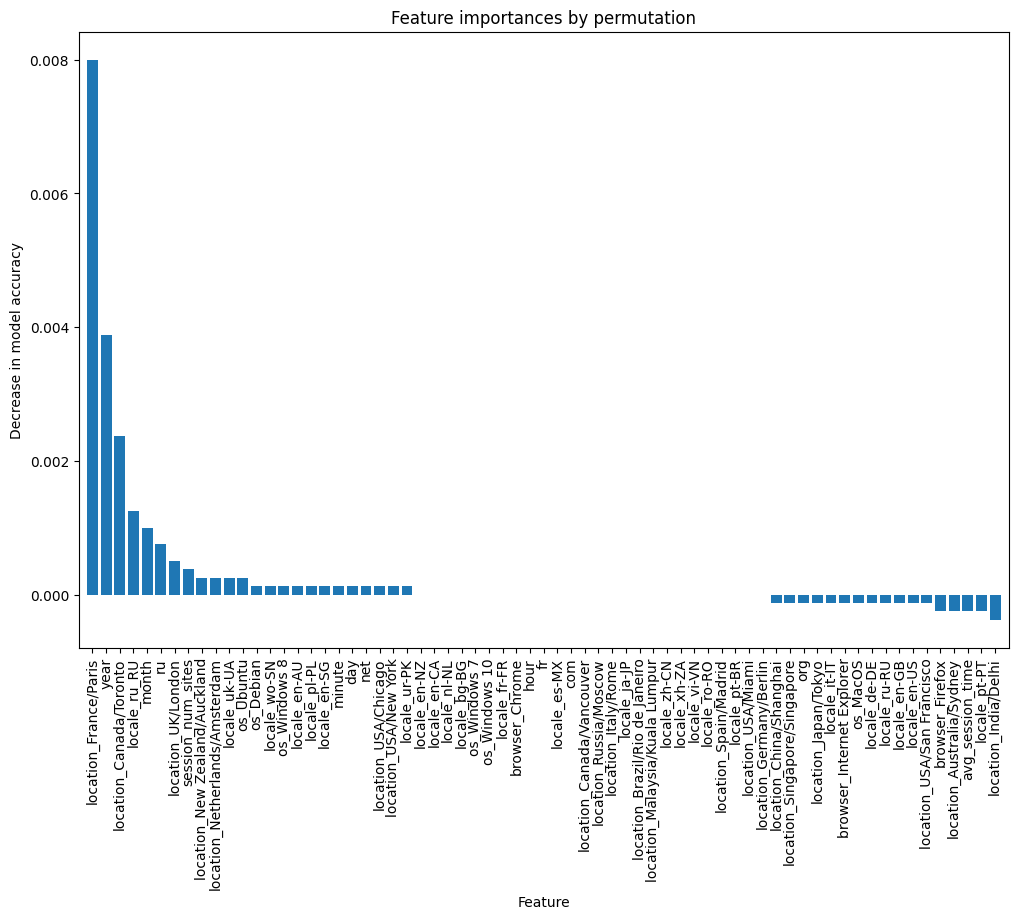

In [31]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances by permutation")
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xticks(range(X_test.shape[1]), sorted_names, rotation=90)  # rotate names for better readability
plt.xlim([-1, X_test.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Decrease in model accuracy')
plt.show()

# Evaluation

### Loading Verification Data

As a part of the model evaluation process, we proceed to load an additional dataset for verification. This dataset, `task_1_verify.json`, is assumed to contain new instances that the model has not seen before, which will allow us to assess the model's generalization capabilities

In [32]:
# Load the JSON file into a Pandas DataFrame
verify_df = pd.read_json('task_1_verify.json')

We notice that the verify Data is similar to the train data with the exception of not having `user_id`

In [33]:
# Display the first few rows to confirm the structure of the verification dataset
verify_df.head()

,browser,os,locale,location,sites,time,date
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19


The verify Data have the same data types as the training data, so we have to treat the data the same way we did with training data

In [34]:
verify_df.dtypes

browser             object
os                  object
locale              object
location            object
sites               object
time                object
date        datetime64[ns]
dtype: object

The verify Data has the same redundent feature just like the training dataset

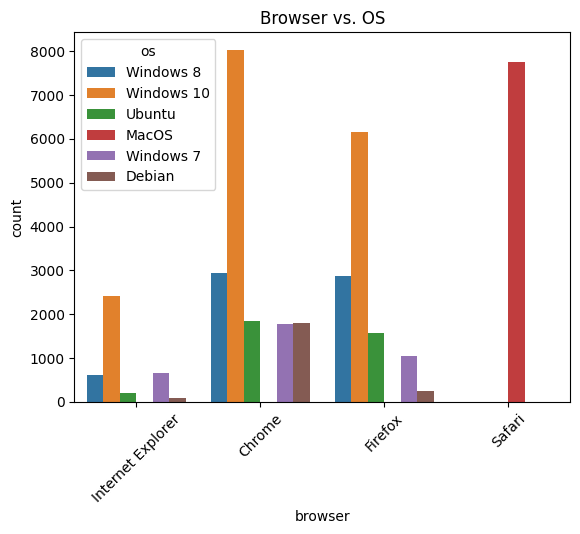

In [35]:
# Create a count plot to explore the relationship between browser and operating system
sns.countplot(x='browser', hue='os', data=verify_df)
plt.title('Browser vs. OS')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()  # Display the plot

## Data Preprocessing and Feature Engineering on the verify Data
In the following cells we will preprocess and add features to our verify dataset the same way we did with the training dataset

### Creating Features for Top Domains

In [36]:
# Select the top 5 domains
top_domains = sorted_domains[:5]

# Add dummy variables for the top 5 domains to the DataFrame
for domain in top_domains:
    verify_df[domain] = 0

# Update the dummy variables based on sessions in the DataFrame
for i, session in enumerate(verify_df['sites']):
    for site_data in session:
        site_url = site_data['site']
        # Extract the domain from the site URL
        domain = site_url.split('.')[-1]
        # Check if the domain is one of the top 5 domains
        if domain in top_domains:
            # Update the corresponding dummy variable to 1 if the domain is present in the session
            verify_df.at[i, domain] = 1

# Display the updated DataFrame with dummy variables for the top 5 domains
verify_df.head()

,browser,os,locale,location,sites,time,date,com,fr,org,net,ru
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05,1,0,0,0,0
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22,1,0,0,0,1
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30,1,0,0,1,0
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27,1,0,0,1,0
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19,1,0,1,0,1


### Session Time and Site Count


In [37]:
# Initialize lists to store the new feature values
avg_time_column = []
num_sites_column = []

# Loop over each row's 'sites' data to calculate the new features
for sites in verify_df['sites']:
    time = 0
    lengths = []
    # Ensure there are sites in the session to avoid division by zero
    if len(sites) != 0:
        for site in sites:
            time += site['length']  # Sum the length of each site visit
            lengths.append(site['length'])

        avg_time_column.append(int(time / len(sites)))  # Calculate average time
        num_sites_column.append(len(sites))  # Count the number of sites
    else:
        avg_time_column.append(0)  # Default to 0 if no sites were visited
        num_sites_column.append(0)

# Drop the original 'sites' column as it's no longer needed
verify_df.drop(columns=['sites'], inplace=True)

# Add the new features to the DataFrame
verify_df['session_num_sites'] = num_sites_column
verify_df['avg_session_time'] = avg_time_column

# Display the updated DataFrame with the new features
verify_df.head()

,browser,os,locale,location,time,date,com,fr,org,net,ru,session_num_sites,avg_session_time
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,14:13:00,2016-11-05,1,0,0,0,0,7,157
1,Chrome,Windows 10,ja-JP,Germany/Berlin,21:06:00,2017-02-22,1,0,0,0,1,7,80
2,Chrome,Windows 10,it-IT,Singapore/Singapore,13:17:00,2016-01-30,1,0,0,1,0,3,194
3,Chrome,Windows 10,ur-PK,UK/London,17:00:00,2017-02-27,1,0,0,1,0,5,169
4,Firefox,Ubuntu,en-CA,Russia/Moscow,18:11:00,2017-04-19,1,0,1,0,1,10,99


### Converting Time Column to Datetime Format

In [38]:
# Convert the 'time' column from a string format to a datetime object
verify_df['time'] = pd.to_datetime(verify_df['time'], format='%H:%M:%S')

# Check the new data types of the DataFrame to confirm the successful conversion
verify_df.dtypes

browser                      object
os                           object
locale                       object
location                     object
time                 datetime64[ns]
date                 datetime64[ns]
com                           int64
fr                            int64
org                           int64
net                           int64
ru                            int64
session_num_sites             int64
avg_session_time              int64
dtype: object

### Extracting Date and Time Components

In [39]:
# Extract year, month, and day from 'date' column
verify_df['year'] = verify_df['date'].dt.year
verify_df['month'] = verify_df['date'].dt.month
verify_df['day'] = verify_df['date'].dt.day

# Extract hour and minute from 'time' column
verify_df['hour'] = verify_df['time'].dt.hour
verify_df['minute'] = verify_df['time'].dt.minute

# Drop the original 'date' and 'time' columns as they are now redundant
verify_df.drop(columns=['date', 'time'], inplace=True)

# Display the first few rows of the DataFrame to verify the new columns
verify_df.head()

,browser,os,locale,location,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,day,hour,minute
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,1,0,0,0,0,7,157,2016,11,5,14,13
1,Chrome,Windows 10,ja-JP,Germany/Berlin,1,0,0,0,1,7,80,2017,2,22,21,6
2,Chrome,Windows 10,it-IT,Singapore/Singapore,1,0,0,1,0,3,194,2016,1,30,13,17
3,Chrome,Windows 10,ur-PK,UK/London,1,0,0,1,0,5,169,2017,2,27,17,0
4,Firefox,Ubuntu,en-CA,Russia/Moscow,1,0,1,0,1,10,99,2017,4,19,18,11


### One-Hot Encoding of Categorical Features

In [40]:
# Generate dummy variables for categorical columns
browser_dummies = pd.get_dummies(verify_df['browser'], prefix='browser').astype('int')
os_dummies = pd.get_dummies(verify_df['os'], prefix='os').astype('int')
locale_dummies = pd.get_dummies(verify_df['locale'], prefix='locale').astype('int')
location_dummies = pd.get_dummies(verify_df['location'], prefix='location').astype('int')

# Concatenate the dummy variable DataFrames to the original DataFrame
verify_df = pd.concat([verify_df, browser_dummies, os_dummies, locale_dummies, location_dummies], axis=1)

# Drop the original columns as they have been replaced by the dummy variables
verify_df.drop(columns=['browser', 'os', 'locale', 'location'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
verify_df.head()

,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,day,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,1,0,0,0,0,7,157,2016,11,5,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,7,80,2017,2,22,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,3,194,2016,1,30,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,5,169,2017,2,27,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,1,10,99,2017,4,19,...,0,0,1,0,0,0,0,0,0,0


### Removing Redundant Feature: `Safari Browser`

In [41]:
# Remove the column 'browser_Safari' from the DataFrame
verify_df = verify_df.drop('browser_Safari', axis=1)

# Display the first few rows of the modified DataFrame
verify_df.head()

,com,fr,org,net,ru,session_num_sites,avg_session_time,year,month,day,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,1,0,0,0,0,7,157,2016,11,5,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,7,80,2017,2,22,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,3,194,2016,1,30,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,5,169,2017,2,27,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,1,10,99,2017,4,19,...,0,0,1,0,0,0,0,0,0,0


### Scaling Verification Dataset

To ensure consistency in the scale of data and compatibility with the trained model, we apply the same scaling transformation to the verification dataset

In [42]:
# Apply the same scaler to transform the verification data
verify_test = scaler.transform(verify_df)

### Making Predictions on the Verification Dataset

With the verification dataset processed and scaled, we can now apply the trained ANN model to make predictions:

- **Prediction Process**:
  - The `predict` method of our trained model is called on the `verify_test` dataset, which outputs the probability of each session belonging to the target class.
  - We round these probabilities to the nearest integer to yield a binary outcome—identifying whether each session is likely to be associated with 'Waldo'.

- **Interpreting Predictions**:
  - The resulting predictions are binary flags, with `1` indicating the model's identification of the session as matching 'Waldo' and `0` representing non-Waldo sessions.


In [43]:
# Generate predictions from the model for the verification dataset
pred = model.predict(verify_test)

# Round the predictions to obtain binary outcomes
verify_pred = np.round(pred)

1250/1250 [==============================] - 3s 2ms/step


### Updating Verification Data with Predictions

With predictions made on the verification dataset, our next step is to integrate these predictions back into the original data structure:

- **Integration Process**:
  - We loop through each entry in the original dataset, appending a new `is_waldo` key with the model's prediction.
  - The prediction is converted to a boolean (`True` for `1` and `False` for `0`).

- **Data Preservation**:
  - It's important to maintain the integrity of the original data, so we update each new entry with the existing data from the original dataset.

- **Saving Updated Data**:
  - The updated dataset, which now includes the model's predictions, is saved to the JSON file, preserving the order and structure of the original data.

In [44]:
# Load the original verification data from the JSON file
with open('task_1_verify.json', 'r') as file:
    original_data = json.load(file)

# Initialize an empty list to hold the updated data entries
updated_data = []

# Iterate over each entry and its corresponding prediction
for i, entry in enumerate(original_data):
    # Create a new dictionary starting with the 'is_waldo' prediction
    new_entry = {'is_waldo': bool(verify_pred[i])}
    # Add the remaining data from the original entry
    new_entry.update(entry)
    # Append the updated entry to the list
    updated_data.append(new_entry)

# Write the updated data the JSON file, with formatting for readability
with open('task_1_verify.json', 'w') as file:
    json.dump(updated_data, file, indent=4)